In [10]:
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "seaborn"

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle

import sys
sys.path.append("..")

from pygalaxy import Euler_symplectic_tree, ADB6
#from pygalaxy import init_solar_system
from pygalaxy.barnes_hut_array import compute_energy_and_tree_structure
#from pygalaxy.naive import compute_energy

In [11]:
def init_solar_system(dim=2):
    """ Initialize the solar system with particles in d dimensions.

    Args:
        dim: Number of dimensions (default is 3).

    Returns:
        mass: Array of masses.
        bodies: Array of particles [nb_particles, dim, x], where x includes position and velocity.
    """
    assert( (dim>=2)&(dim<=3))
    # Initial positions and velocities
    if dim == 2:
        positions = np.array([[        0, 0],       # Sun
                            [    -46e9, 0],       # Mercury
                            [ -10748e7, 0],       # Venus
                            [-147095e6, 0],       # Earth
                            [ -20662e7, 0]])      # Mars

        velocities = np.array([[      0,      0],   # Sun
                            [      0, -58980],    # Mercury
                            [      0, -35260],    # Venus
                            [      0, -30300],    # Earth
                            [      0, -26500]])   # Mars
    elif dim == 3:
        positions = np.array([[        0, 0, 100000],       # Sun
                            [    -46e9, 0, 0],       # Mercury
                            [ -10748e7, 0, 0],       # Venus
                            [-147095e6, 0, 0],       # Earth
                            [ -20662e7, 0, 0]])      # Mars

        velocities = np.array([[      0,      0, 0],   # Sun
                            [      0, -58980, 0],    # Mercury
                            [      0, -35260, 0],    # Venus
                            [      0, -30300, 0],    # Earth 
                            [      0, -26500, 0]])   # Mars
    else:
        return ValueError

    # Combine positions and velocities
    bodies = np.empty((positions.shape[0], dim, 2))  # [nb_particles, dim, 2]
    bodies[:, :, 0] = positions
    bodies[:, :, 1] = velocities

    # Masses of the bodies
    mass = np.array([  1.989e30,  # Sun
                      0.33011e24, # Mercury
                      4.8675e24,  # Venus
                       5.972e24,  # Earth
                      6.4171e23]) # Mars
    planets = ['sun', 'mercury', 'venus', 'earth', 'mars', 'jupiter', 
           'saturn', 'uranus', 'neptune']

    return mass, bodies, planets[:mass.shape[0]]

0/199
1/199
2/199
3/199
4/199
5/199
6/199
7/199
8/199
9/199
10/199
11/199
12/199
13/199
14/199
15/199
16/199
17/199
18/199
19/199
20/199
21/199
22/199
23/199
24/199
25/199
26/199
27/199
28/199
29/199
30/199
31/199
32/199
33/199
34/199
35/199
36/199
37/199
38/199
39/199
40/199
41/199
42/199
43/199
44/199
45/199
46/199
47/199
48/199
49/199
50/199
51/199
52/199
53/199
54/199
55/199
56/199
57/199
58/199
59/199
60/199
61/199
62/199
63/199
64/199
65/199
66/199
67/199
68/199
69/199
70/199
71/199
72/199
73/199
74/199
75/199
76/199
77/199
78/199
79/199
80/199
81/199
82/199
83/199
84/199
85/199
86/199
87/199
88/199
89/199
90/199
91/199
92/199
93/199
94/199
95/199
96/199
97/199
98/199
99/199
100/199
101/199
102/199
103/199
104/199
105/199
106/199
107/199
108/199
109/199
110/199
111/199
112/199
113/199
114/199
115/199
116/199
117/199
118/199
119/199
120/199
121/199
122/199
123/199
124/199
125/199
126/199
127/199
128/199
129/199
130/199
131/199
132/199
133/199
134/199
135/199
136/199
137/199
138/19

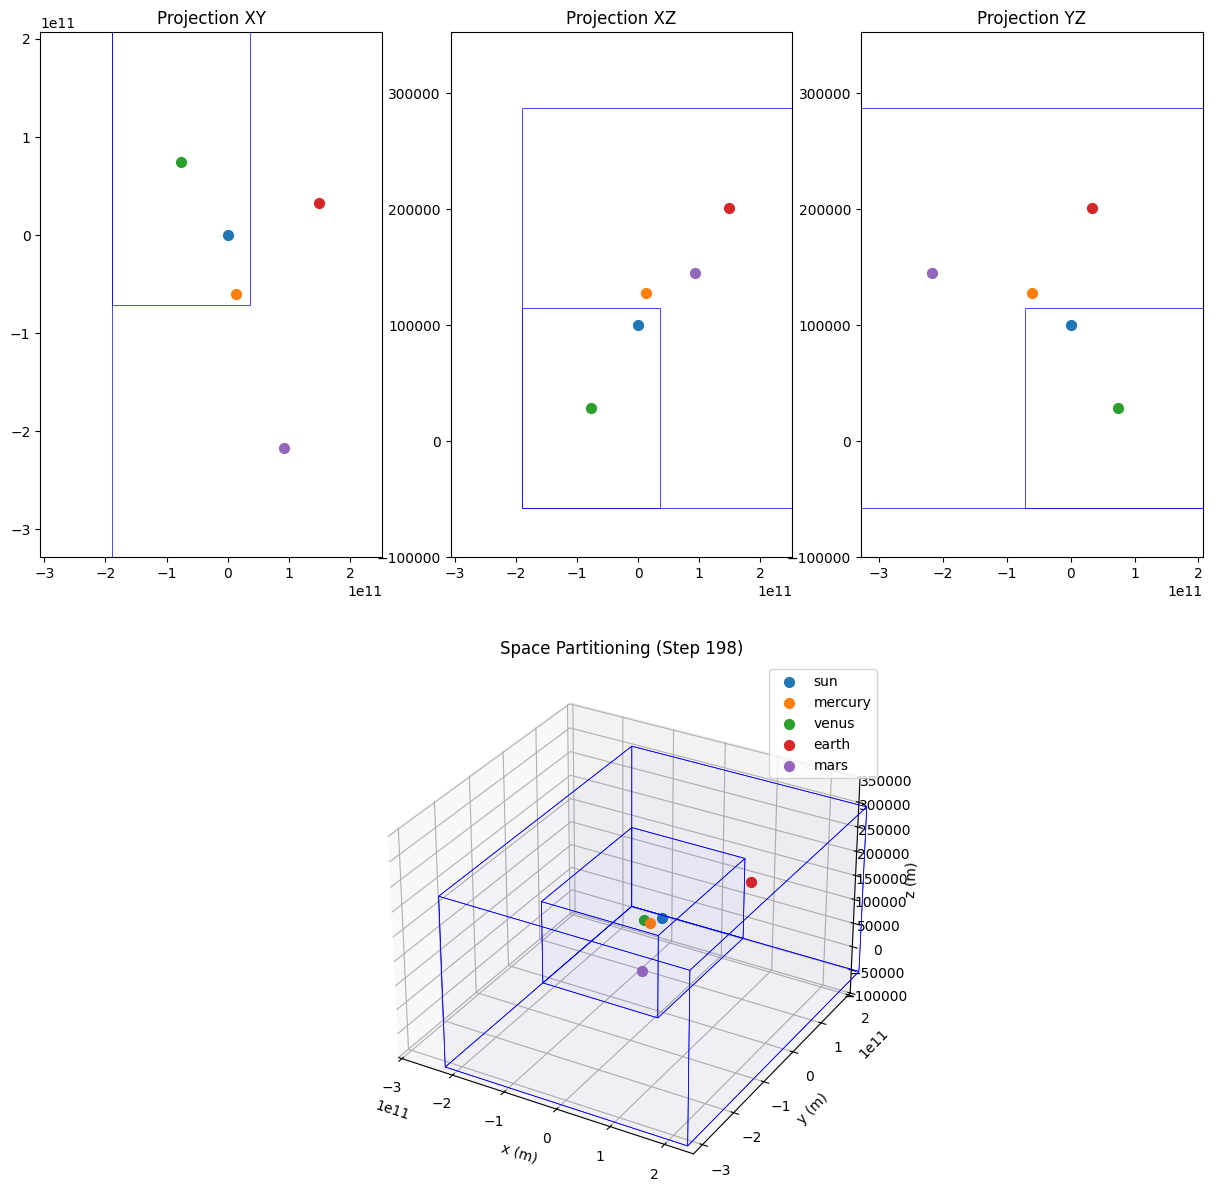

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.patches import Rectangle

# Simulation parameters
dt = 86400  # 1 day in seconds
nt = 200  # Number of time steps
dim = 3  # Number of dimensions

# Initialize solar system
mass, particles, planets = init_solar_system(dim)

# Number of bodies
nbodies = particles.shape[0]

# Initialize the integrator
time_method = Euler_symplectic_tree(dt, nbodies, dim, compute_energy_and_tree_structure)  # Replace `None` with the appropriate force computation method

# Arrays to store positions and velocities over time
coords = np.zeros((nt, nbodies, dim))
coords[0] = particles[:, :, 0]  # Initial positions

velocities = np.zeros((nt, nbodies, dim))
velocities[0] = particles[:, :, 1]  # Initial velocities

trees = []

# Time-stepping loop
for i in range(nt - 1):
    print(f"{i}/{nt-1}")
    time_method.update(mass, particles)
    coords[i + 1] = particles[:, :, 0]
    velocities[i + 1] = particles[:, :, 1]
    trees.append(time_method.tree)  # Stocke la structure de l'arbre à chaque étape

# Fonction pour mettre à jour l'animation
def update(frame):
    for ax in [ax1, ax2, ax3, ax4]:
        ax.clear()

    # Récupération de l'arbre pour la frame actuelle
    tree = trees[frame]

    # Vérification de l'arbre
    if "cell_centers" not in tree or "cell_radii" not in tree:
        print(f"Frame {frame}: Tree structure missing keys.")
        return  # Si l'arbre est vide ou mal formaté, ignorer

    # Projection XY
    ax1.set_title("Projection XY")
    ax1.set_xlim(np.min(coords[:, :, 0]) - 1e11, np.max(coords[:, :, 0]) + 1e11)
    ax1.set_ylim(np.min(coords[:, :, 1]) - 1e11, np.max(coords[:, :, 1]) + 1e11)
    for i in range(len(planets)):
        ax1.scatter(coords[frame, i, 0], coords[frame, i, 1], label=planets[i], s=50)

    # Dessin des boîtes dans XY
    for i in range(tree["cell_centers"].shape[0]):
        center = tree["cell_centers"][i]
        radius = tree["cell_radii"][i]
        if len(center) != 3 or len(radius) != 3:
            print(f"Invalid cell data at index {i}: center={center}, radius={radius}")
            continue
        rect = Rectangle(
            (center[0] - radius[0], center[1] - radius[1]),
            2 * radius[0],
            2 * radius[1],
            edgecolor="blue",
            facecolor="none",
            linewidth=0.5
        )
        ax1.add_patch(rect)
    

    # Projection XZ
    ax2.set_title("Projection XZ")
    ax2.set_xlim(np.min(coords[:, :, 0]) - 1e11, np.max(coords[:, :, 0]) + 1e11)
    ax2.set_ylim(np.min(coords[:, :, 2]) - 1e5, np.max(coords[:, :, 2]) + 1e5)
    for i in range(len(planets)):
        ax2.scatter(coords[frame, i, 0], coords[frame, i, 2], label=planets[i], s=50)

    # Dessin des boîtes dans XZ
    for i in range(tree["cell_centers"].shape[0]):
        center = tree["cell_centers"][i]
        radius = tree["cell_radii"][i]
        if len(center) != 3 or len(radius) != 3:
            continue
        rect = Rectangle(
            (center[0] - radius[0], center[2] - radius[2]),
            2 * radius[0],
            2 * radius[2],
            edgecolor="blue",
            facecolor="none",
            linewidth=0.5
        )
        ax2.add_patch(rect)

    # Projection YZ
    ax3.set_title("Projection YZ")
    ax3.set_xlim(np.min(coords[:, :, 1]) - 1e11, np.max(coords[:, :, 1]) + 1e11)
    ax3.set_ylim(np.min(coords[:, :, 2]) - 1e5, np.max(coords[:, :, 2]) + 1e5)
    for i in range(len(planets)):
        ax3.scatter(coords[frame, i, 1], coords[frame, i, 2], label=planets[i], s=50)

    # Dessin des boîtes dans YZ
    for i in range(tree["cell_centers"].shape[0]):
        center = tree["cell_centers"][i]
        radius = tree["cell_radii"][i]
        if len(center) != 3 or len(radius) != 3:
            continue
        rect = Rectangle(
            (center[1] - radius[1], center[2] - radius[2]),
            2 * radius[1],
            2 * radius[2],
            edgecolor="blue",
            facecolor="none",
            linewidth=0.5
        )
        ax3.add_patch(rect)

    # Vue 3D classique
    ax4.set_title(f"Space Partitioning (Step {frame})")
    ax4.set_xlim(np.min(coords[:, :, 0]) - 1e11, np.max(coords[:, :, 0]) + 1e11)
    ax4.set_ylim(np.min(coords[:, :, 1]) - 1e11, np.max(coords[:, :, 1]) + 1e11)
    ax4.set_zlim(np.min(coords[:, :, 2]) - 1e5, np.max(coords[:, :, 2]) + 1e5)
    ax4.set_xlabel("x (m)")
    ax4.set_ylabel("y (m)")
    ax4.set_zlabel("z (m)")
    for i in range(len(planets)):
        ax4.scatter(coords[frame, i, 0], coords[frame, i, 1], coords[frame, i, 2], label=planets[i], s=50)

    # Dessin des boîtes dans la vue 3D
    for i in range(tree["cell_centers"].shape[0]):
        center = tree["cell_centers"][i]
        radius = tree["cell_radii"][i]
        if len(center) != 3 or len(radius) != 3:
            continue
        # Coordonnées des sommets de la boîte
        vertices = [
            [center[0] - radius[0], center[1] - radius[1], center[2] - radius[2]],
            [center[0] + radius[0], center[1] - radius[1], center[2] - radius[2]],
            [center[0] + radius[0], center[1] + radius[1], center[2] - radius[2]],
            [center[0] - radius[0], center[1] + radius[1], center[2] - radius[2]],
            [center[0] - radius[0], center[1] - radius[1], center[2] + radius[2]],
            [center[0] + radius[0], center[1] - radius[1], center[2] + radius[2]],
            [center[0] + radius[0], center[1] + radius[1], center[2] + radius[2]],
            [center[0] - radius[0], center[1] + radius[1], center[2] + radius[2]],
        ]

        # Faces de la boîte
        faces = [
            [vertices[0], vertices[1], vertices[5], vertices[4]],
            [vertices[1], vertices[2], vertices[6], vertices[5]],
            [vertices[2], vertices[3], vertices[7], vertices[6]],
            [vertices[3], vertices[0], vertices[4], vertices[7]],
            [vertices[0], vertices[1], vertices[2], vertices[3]],
            [vertices[4], vertices[5], vertices[6], vertices[7]],
        ]

        box = Poly3DCollection(faces, edgecolor="blue", facecolor="blue", alpha=0.01, linewidths=0.5)
        ax4.add_collection3d(box)

    ax4.legend(loc="upper right")

# Création de la figure avec les 4 sous-graphes
fig = plt.figure(figsize=(15, 15))

# Projections
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
# Vue 3D classique
ax4 = fig.add_subplot(2, 1, 2, projection='3d')

ani = FuncAnimation(fig, update, frames=nt - 1, interval=200)

# Sauvegarde en GIF
ani.save("space_partition_evolution_3D.gif", writer="pillow", fps=10)

# Affichage dans le notebook
plt.show()
